### Task


Challenge Overview
Your goal is to generate an undirected network that is as close as possible to the original real network. You do not have the original network in the explicit view, but you know some of its statistics. All statistics are in stats.txt file that contains a dictionary of the form
* number_nodes (number of nodes): value
* number_cc (number of connected components): value, sigma
* radius (radius of giant component): value, sigma
* diameter (diameter of giant component): value, sigma
* average_clustering (average clustering coefficient): value, sigma
* average_path_length (average path length): value, sigma
*degree_cdf (empirical CDF of degree distribution): values, probabilities

Meaning of all these sigmas is described in Evaluation section. 

You can use this code to draw CDF


In [ ]:
"""
q_seq, p_seq = stats['degree_cdf']
plt.plot(
    np.append(np.repeat(q_seq, 2)[1:], q_seq[-1]), 
    np.repeat(p_seq, 2)
)
plt.show()
"""

"\nq_seq, p_seq = stats['degree_cdf']\nplt.plot(\n    np.append(np.repeat(q_seq, 2)[1:], q_seq[-1]), \n    np.repeat(p_seq, 2)\n)\nplt.show()\n"

### Precondition

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import scipy as sp
import numpy as np
import ast

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### NotMy

In [ ]:
f = open('/content/drive/MyDrive/Colab Notebooks/HSE/HSE 2 sem/Network Science/Competition1/stats.txt')
stats = ast.literal_eval(f.read())
q_seq, p_seq = stats['degree_cdf']

##### CDF and PDF

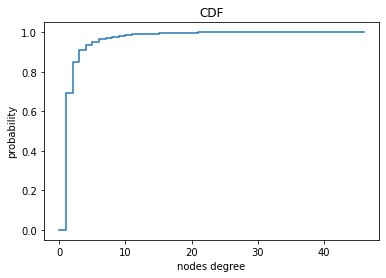

In [ ]:
plt.plot(
    np.append(np.repeat(q_seq, 2)[1:], q_seq[-1]), 
    np.repeat(p_seq, 2)
)
plt.title("CDF")
plt.ylabel("probability")
plt.xlabel("nodes degree")
plt.show()

In [ ]:
for i in stats:
  print(i,":",stats[i])

number_nodes : 1882
radius : [15, 2]
diameter : [28, 4]
average_clustering : [0.005066798238955518, 0.001]
average_path_length : [11.748410823170731, 2]
number_cc : [168, 32]
degree_cdf : [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 24, 46], [0.0, 0.6902231668437833, 0.8517534537725824, 0.9086078639744952, 0.9378320935175345, 0.9516471838469713, 0.9654622741764081, 0.9723698193411264, 0.9776833156216791, 0.9808714133900106, 0.9845908607863975, 0.9888416578108395, 0.9893730074388948, 0.9925611052072264, 0.9936238044633369, 0.9952178533475027, 0.9957492029755579, 0.9968119022316685, 0.997874601487779, 0.9989373007438895, 0.9994686503719448, 1.0]]


##### Generate

In [ ]:
G = nx.connected_watts_strogatz_graph(n=1546, k=3, p=0.9, tries=50)
max_degree = 0
node_max_degree = 0
for i in list(G.degree):
    if i[1] > max_degree:
        max_degree = i[1]
        node_max_degree = i[0]

for i in range(100, 140):
    G.add_edge(node_max_degree, i)

for i in range(200, 230):
    G.add_edge(500, i)

for i in range(400, 430):
    G.add_edge(800, i)

for i in range(1200, 1230):
    G.add_edge(1546, i)

for i in range(1545, 1547):
    G.add_edge(i, i + 1)

for i in range(1548, 1882, 2):
    G.add_edge(i, i + 1)

node_max_degree = 0
max_degree = 0
for i in list(G.degree):
    if i[1] > max_degree:
        max_degree = i[1]
        node_max_degree = i[0]

##### Scores

In [ ]:
def GK(param_true, param, sigma):
    return np.exp(-(param_true - param)**2 / (2 * sigma**2))
    
S = G.subgraph(max(nx.connected_components(G), key=len))
eval_radius = GK(stats['radius'][0], nx.radius(S), stats['radius'][1])
eval_diameter = GK(stats['diameter'][0], nx.diameter(S), stats['diameter'][1])
eval_average_clustering = GK(stats['average_clustering'][0], nx.average_clustering(S), stats['average_clustering'][1])
eval_path_length = GK(stats['average_path_length'][0], nx.average_shortest_path_length(S), stats['average_path_length'][1])
eval_number_cc = GK(stats['number_cc'][0], nx.number_connected_components(G), stats['number_cc'][1])
print('number_nodes:', len(G.nodes))
print('radius:', eval_radius)
print('diametr:', eval_diameter)
print('average_clustering:', eval_average_clustering)
print('average_path_length:', eval_path_length)
print('number_cc:', eval_number_cc)
print('Total score:', 1/6 * (eval_radius + eval_diameter + eval_average_clustering + eval_path_length + eval_number_cc) * 100)


number_nodes: 1882
radius: 0.6065306597126334
diametr: 0.32465246735834974
average_clustering: 0.0003125947996018062
average_path_length: 0.9328714800495602
number_cc: 1.0
Total score: 47.73945336533575


In [ ]:
from typing import List
def empirical_cdf(g: nx.Graph) -> List[float]:
    deg = nx.degree_histogram(g)
    probability = np.zeros(len(deg))
    probability[0] = deg[0] / sum(deg)
    for i in range(len(deg)):
        probability[i] = probability[i - 1] + deg[i] / sum(deg)
    return probability

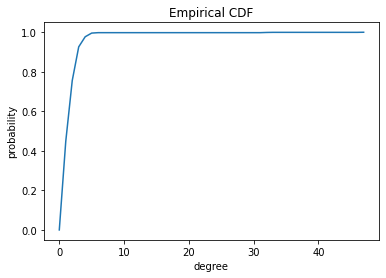

In [ ]:
ecdfG = empirical_cdf(G)
plt.plot(ecdfG)
plt.xlabel('degree')
plt.ylabel('probability')
plt.title('Empirical CDF')
plt.show()

##### Export

In [ ]:
for i in list(G.edges):
    print(*i)

0 428
0 993
1 2
1 987
2 1466
3 986
4 217
5 716
5 73
5 388
6 327
6 853
7 672
8 65
9 1041
9 190
9 337
9 986
9 1019
10 679
10 836
11 88
12 96
12 67
12 480
13 53
14 392
14 1323
15 1014
15 23
15 1447
16 461
16 1453
17 501
18 120
18 1095
19 20
20 1135
21 22
22 1442
22 430
24 1366
25 26
26 1218
26 809
27 1220
27 63
27 395
27 469
28 187
29 924
29 140
30 665
30 323
30 428
30 1113
31 1530
32 372
32 1115
33 1209
33 426
34 456
34 344
34 429
34 697
34 930
34 950
34 974
34 1107
34 100
34 101
34 102
34 103
34 104
34 105
34 106
34 107
34 108
34 109
34 110
34 111
34 112
34 113
34 114
34 115
34 116
34 117
34 118
34 119
34 120
34 121
34 122
34 123
34 124
34 125
34 126
34 127
34 128
34 129
34 130
34 131
34 132
34 133
34 134
34 135
34 136
34 137
34 138
34 139
35 36
35 253
36 553
36 513
36 797
37 1137
37 478
38 132
39 1181
39 268
40 1041
40 552
41 1341
41 186
42 1330
43 188
43 1469
44 1280
44 685
44 1137
45 46
46 127
46 455
46 1468
47 1338
48 372
48 329
48 1541
49 596
50 358
51 1534
51 539
52 1267
53 1501
5